# Link prediction using examples from slides

## Import libraries and define some auxiliary functions

In [1]:
import networkx as nx

In [2]:
def print_sorted_descending_by_value(predicted_edges):
    """
    Takes a list of tuples and prints the tuples in ascending order according the 3rd element
    """
    print(*sorted(predicted_edges, reverse=True, key=lambda tup: tup[2]), sep="\n")

## Graph definition

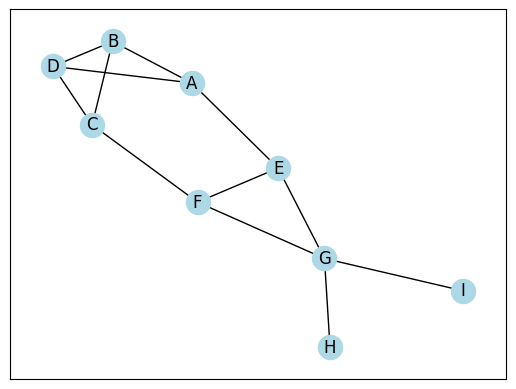

In [3]:
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H", "I"])
G.add_edges_from([("A", "B"), ("A", "D"), ("A", "E"), 
                  ("B", "C"), ("B", "D"),
                  ("C", "D"), ("C", "F"), 
                  ("E", "F"),("E", "G"),
                  ("F", "G"),
                  ("G", "H"),("G", "I")])

nx.draw_networkx(G, node_color="lightblue")

## Preferential Attachment

In [4]:
pref_attachment = list(nx.preferential_attachment(G))
print_sorted_descending_by_value(pref_attachment)

('G', 'B', 12)
('G', 'C', 12)
('G', 'D', 12)
('G', 'A', 12)
('E', 'C', 9)
('E', 'D', 9)
('E', 'B', 9)
('F', 'A', 9)
('F', 'B', 9)
('F', 'D', 9)
('C', 'A', 9)
('E', 'I', 3)
('E', 'H', 3)
('I', 'F', 3)
('I', 'C', 3)
('I', 'D', 3)
('I', 'A', 3)
('I', 'B', 3)
('F', 'H', 3)
('H', 'B', 3)
('H', 'C', 3)
('H', 'D', 3)
('H', 'A', 3)
('I', 'H', 1)


## Common Neighbours
There is no common neighbours function that calculates the number of common neighbours for all unconnected node pairs. But there is a common_neighbours method which takes two node arguments and returns the number of neighbours. So we just need to create a list of node of all unconnected node pairs by hand and call the common neighbours method for each pair.

In [5]:
all_nodes = list(G.nodes())
all_unconnected_pairs = []
for i in range(0, len(all_nodes)):
    for j in range(i+1, len(all_nodes)):
        first = all_nodes[i]
        second = all_nodes[j]
        if not G.has_edge(first, second):
            all_unconnected_pairs.append((first, second))
print(all_unconnected_pairs)

[('A', 'C'), ('A', 'F'), ('A', 'G'), ('A', 'H'), ('A', 'I'), ('B', 'E'), ('B', 'F'), ('B', 'G'), ('B', 'H'), ('B', 'I'), ('C', 'E'), ('C', 'G'), ('C', 'H'), ('C', 'I'), ('D', 'E'), ('D', 'F'), ('D', 'G'), ('D', 'H'), ('D', 'I'), ('E', 'H'), ('E', 'I'), ('F', 'H'), ('F', 'I'), ('H', 'I')]


Hint: The code snipped above could also be written using list comprehensions in three code-lines:
```python
nodes = list(G.nodes())
all_unconnected_pairs = [(nodes[i], nodes[j]) for i in range(0, len(nodes)) for j in range (i+1, len(nodes)) if not G.has_edge(nodes[i], nodes[j])]
print(all_unconnected_pairs)
```

In [6]:
common_neighbours = [(u, v, len(list(nx.common_neighbors(G, u, v)))) for (u, v) in all_unconnected_pairs]
print_sorted_descending_by_value(common_neighbours)

('A', 'C', 2)
('A', 'F', 1)
('A', 'G', 1)
('B', 'E', 1)
('B', 'F', 1)
('C', 'E', 1)
('C', 'G', 1)
('D', 'E', 1)
('D', 'F', 1)
('E', 'H', 1)
('E', 'I', 1)
('F', 'H', 1)
('F', 'I', 1)
('H', 'I', 1)
('A', 'H', 0)
('A', 'I', 0)
('B', 'G', 0)
('B', 'H', 0)
('B', 'I', 0)
('C', 'H', 0)
('C', 'I', 0)
('D', 'G', 0)
('D', 'H', 0)
('D', 'I', 0)


## Jaccard Similarity

In [7]:
jaccard = list(nx.jaccard_coefficient(G))
print_sorted_descending_by_value(jaccard)

('I', 'H', 1.0)
('C', 'A', 0.5)
('E', 'I', 0.3333333333333333)
('E', 'H', 0.3333333333333333)
('I', 'F', 0.3333333333333333)
('F', 'H', 0.3333333333333333)
('E', 'C', 0.2)
('E', 'D', 0.2)
('E', 'B', 0.2)
('F', 'A', 0.2)
('F', 'B', 0.2)
('F', 'D', 0.2)
('G', 'C', 0.16666666666666666)
('G', 'A', 0.16666666666666666)
('I', 'C', 0.0)
('I', 'D', 0.0)
('I', 'A', 0.0)
('I', 'B', 0.0)
('G', 'B', 0.0)
('G', 'D', 0.0)
('H', 'B', 0.0)
('H', 'C', 0.0)
('H', 'D', 0.0)
('H', 'A', 0.0)


## Resource Allocation

In [8]:
resource_allocation = list(nx.resource_allocation_index(G))
print_sorted_descending_by_value(resource_allocation)

('C', 'A', 0.6666666666666666)
('E', 'C', 0.3333333333333333)
('E', 'D', 0.3333333333333333)
('E', 'B', 0.3333333333333333)
('G', 'C', 0.3333333333333333)
('G', 'A', 0.3333333333333333)
('F', 'A', 0.3333333333333333)
('F', 'B', 0.3333333333333333)
('F', 'D', 0.3333333333333333)
('E', 'I', 0.25)
('E', 'H', 0.25)
('I', 'F', 0.25)
('I', 'H', 0.25)
('F', 'H', 0.25)
('I', 'C', 0)
('I', 'D', 0)
('I', 'A', 0)
('I', 'B', 0)
('G', 'B', 0)
('G', 'D', 0)
('H', 'B', 0)
('H', 'C', 0)
('H', 'D', 0)
('H', 'A', 0)


## Adamic Adar

In [9]:
adamic = list(nx.adamic_adar_index(G))
print_sorted_descending_by_value(adamic)

('C', 'A', 1.8204784532536746)
('E', 'C', 0.9102392266268373)
('E', 'D', 0.9102392266268373)
('E', 'B', 0.9102392266268373)
('G', 'C', 0.9102392266268373)
('G', 'A', 0.9102392266268373)
('F', 'A', 0.9102392266268373)
('F', 'B', 0.9102392266268373)
('F', 'D', 0.9102392266268373)
('E', 'I', 0.7213475204444817)
('E', 'H', 0.7213475204444817)
('I', 'F', 0.7213475204444817)
('I', 'H', 0.7213475204444817)
('F', 'H', 0.7213475204444817)
('I', 'C', 0)
('I', 'D', 0)
('I', 'A', 0)
('I', 'B', 0)
('G', 'B', 0)
('G', 'D', 0)
('H', 'B', 0)
('H', 'C', 0)
('H', 'D', 0)
('H', 'A', 0)


## Soundarajan Hopcroft

In [10]:
import community
partition = community.best_partition(G)
print(partition)

for node, community in partition.items():
        G.nodes[node]['community'] = community
        
soundarajan = list(nx.cn_soundarajan_hopcroft(G))
print_sorted_descending_by_value(soundarajan)

{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 1, 'F': 1, 'G': 1, 'H': 1, 'I': 1}
('C', 'A', 4)
('E', 'I', 2)
('E', 'H', 2)
('I', 'F', 2)
('I', 'H', 2)
('F', 'H', 2)
('E', 'C', 1)
('E', 'D', 1)
('E', 'B', 1)
('G', 'C', 1)
('G', 'A', 1)
('F', 'A', 1)
('F', 'B', 1)
('F', 'D', 1)
('I', 'C', 0)
('I', 'D', 0)
('I', 'A', 0)
('I', 'B', 0)
('G', 'B', 0)
('G', 'D', 0)
('H', 'B', 0)
('H', 'C', 0)
('H', 'D', 0)
('H', 'A', 0)
